In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ielasa visus failus
data1 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data3 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data4 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data5 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data7 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data8 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')

In [2]:
# 2. Apvieno visas datu kopas vienā DataFrame
all_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)
# Noņem liekās atstarpes no kolonnu nosaukumiem
all_data.columns = all_data.columns.str.strip()

In [3]:
rows, cols = all_data.shape
print(f'Number of rows: {rows}, Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

Number of rows: 2830743, Number of columns: 79
Total cells: 223628697


In [4]:
print(all_data['Label'].value_counts())

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


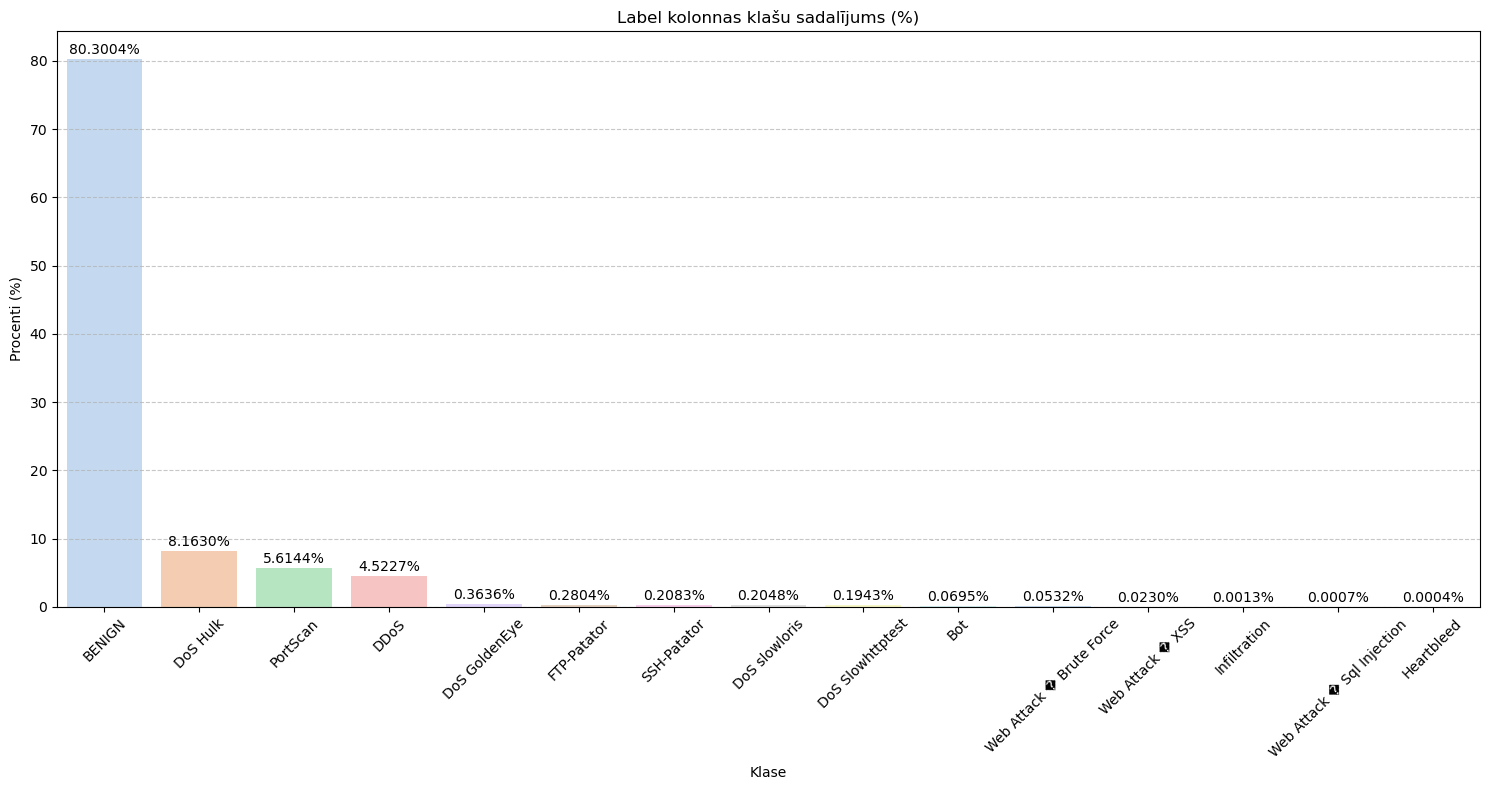

In [5]:
# Aprēķina klašu sadalījumu
label_counts = all_data['Label'].value_counts()
label_percent = label_counts / label_counts.sum() * 100
df_labels = pd.DataFrame({'Label': label_counts.index, 'Count': label_counts.values, 'Percentage': label_percent.values})

# Zīmē stabiņu diagrammu
plt.figure(figsize=(15, 8))
bars = sns.barplot(
    data=df_labels,
    x='Label',
    y='Percentage',
    hue='Label',
    palette='pastel',
    alpha=0.7,
    legend=False
)

# Pievieno procentu anotācijas virs stabiņiem
for bar, percent in zip(bars.patches, df_labels['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{percent:.4f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Label kolonnas klašu sadalījums (%)')
plt.ylabel('Procenti (%)')
plt.xlabel('Klase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
# 3. Pārraksta kategorijas pēc mapping uz vēlamajiem nosaukumiem
label_mapping = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'PortScan',
    'FTP-Patator': 'BruteForce',
    'SSH-Patator': 'BruteForce',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'WebAttack',
    'Web Attack � XSS': 'WebAttack',
    'Web Attack � Sql Injection': 'WebAttack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}
all_data['Label'] = all_data['Label'].map(label_mapping)

# 4. Sadalām datus divās grupās: "BENIGN" un pārējie ("non-BENIGN")
benign_data = all_data[all_data['Label'] == 'BENIGN']
nonbenign_data = all_data[all_data['Label'] != 'BENIGN']

# 5. Atlasām "BENIGN" ierakstus – ja to skaits pārsniedz 25 000, nejauši iekļaujam tikai 25 000; citādi izmanto visus
if len(benign_data) > 25000:
    sampled_benign = benign_data.sample(n=25000, random_state=42)
else:
    sampled_benign = benign_data.copy()

# 6. Aprēķina, cik ierakstu jāatlasīja no non-BENIGN grupas, lai kopā izveidotu 50 000 ierakstu paraugu
nonbenign_required = 50000 - len(sampled_benign)

if len(nonbenign_data) < nonbenign_required:
    print("Brīdinājums: Neesam pietiekami daudz non-BENIGN ierakstu, lai kopā sasniegtu 50 000 ierakstus.")
    sampled_nonbenign = nonbenign_data.copy()
else:
    sampled_nonbenign = nonbenign_data.sample(n=nonbenign_required, random_state=42)

# 7. Pārbauda, vai kādā klasē ir mazāk nekā 25 ieraksti
category_counts = sampled_nonbenign['Label'].value_counts()
small_categories = category_counts[category_counts < 25].index.tolist()

for category in small_categories:
    print(f"Brīdinājums: Kategorija '{category}' satur tikai {category_counts[category]} ierakstu, aizvietoju ar nejauši atlasītiem citiem uzbrukumiem.")
    replacement_samples = nonbenign_data[nonbenign_data['Label'] != category].sample(n=25, random_state=42)
    sampled_nonbenign = sampled_nonbenign[sampled_nonbenign['Label'] != category]
    sampled_nonbenign = pd.concat([sampled_nonbenign, replacement_samples])

# 8. Apvieno BENIGN un pārējās uzbrukumu kategorijas
final_sample_df = pd.concat([sampled_benign, sampled_nonbenign]).sample(frac=1, random_state=42)

# 9. Izvada gala parauga lielumu un kategoriju sadalījumu pirms saglabāšanas
print("Gala parauga lielums:", len(final_sample_df))
print(final_sample_df['Label'].value_counts())

Brīdinājums: Kategorija 'Infiltration' satur tikai 1 ierakstu, aizvietoju ar nejauši atlasītiem citiem uzbrukumiem.
Gala parauga lielums: 50024
BENIGN        25000
DoS           11299
PortScan       7102
DDoS           5798
BruteForce      647
WebAttack        97
Bot              81
Name: Label, dtype: int64


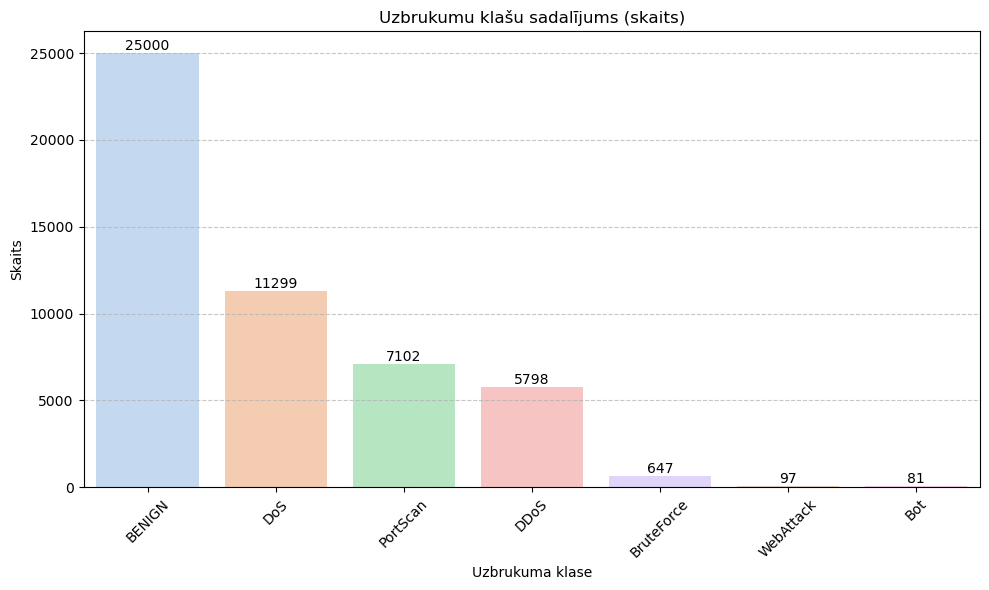

In [7]:
# Aprēķina klašu skaitu tikai uzbrukumiem
label_counts = final_sample_df['Label'].value_counts()
df_labels = pd.DataFrame({'Label': label_counts.index, 'Count': label_counts.values})

# Zīmē stabiņu diagrammu ar skaitliskām vērtībām
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=df_labels,
    x='Label',
    y='Count',
    hue='Label',
    palette='pastel',
    alpha=0.7,
    legend=False
)

# Pievieno skaitliskās vērtības virs stabiņiem
for bar, count in zip(bars.patches, df_labels['Count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, f'{count}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Uzbrukumu klašu sadalījums (skaits)')
plt.ylabel('Skaits')
plt.xlabel('Uzbrukuma klase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
# Saglabā jauno failu ar mapētajām etiķetēm
# 10. Saglabā rezultātu CSV failā (bez indeksiem)
final_sample_df.to_csv('CICIDS2017_sample.csv', index=False)